In [1]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import skill_metrics as sm

In [3]:
from taylor_preprocess import taylor_count

# get partial mask_res collect into a dict
partial_list = ["NE", "NC", "YZ", "SW"]
path_in = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/partial_t2m"
file_ref = "sel_CN05.1_Tm_1961_2018_daily_025x025.nc"
file_vr = "mask_mean_vr_03-15.nc"
file_rcm = "mask_mean_rcm_03-15.nc"
partial_res = {} # partial mask_res
for i in partial_list:
    path_in_partial = path_in + "/" + i + "/mask_res" # refine path
    print(path_in_partial)
    partial_res[i] = taylor_count(path_in_partial, file_ref, "tm", file_vr, "t2m", file_rcm, "t2m")

/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/partial_t2m/NE/mask_res
/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/partial_t2m/NC/mask_res
/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/partial_t2m/YZ/mask_res
/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/partial_t2m/SW/mask_res


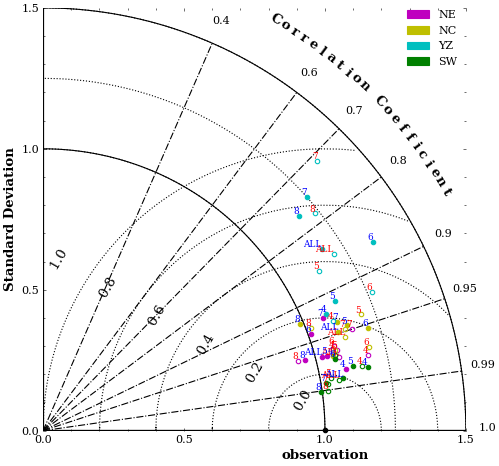

In [11]:
# >> taylor_diagram
# 不是多个模型对同一时段的模拟，绘制taylor图只是说明下相关性
# 逐年的固定某个月份 下面的 rmsd_select_year 在 months 中的范围大致是相同的
# label = ['Non-Dimensional Observation', 'M1']
first_plot = 'off'
color_plot = ["m","y","c","g"]
partial_list = ["NE", "NC", "YZ", "SW"]
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展
# fig,ax = plt.subplots(4,1,figsize=(16,12))
fig = plt.figure(figsize=(7, 7), dpi=80)
# ax1=fig.add_subplot(2,2,1)
# ax2=fig.add_subplot(2,2,3)
ind = 0
for partial_ind in partial_list:
    model_plot = partial_res[partial_ind]
    # label1 = {'VR': 'r', 'RCM': 'b'}
    label2 = ["obs","4","5","6","7","8","ALL"]
    # label2 = 
    # label2 = {"obs":"b","4":"r","5":"g","6":"k","7":"r","8":"r","ALL":"r"}
    lsCOR = np.concatenate((np.arange(0.4,1.0,0.2), [0.7,0.9, 0.95, 0.99, 1]))

    sm.taylor_diagram(model_plot['vr']['sdev'],model_plot['vr']['crmsd'],model_plot['vr']['ccoef'], 
    markerLabel = label2, 
    numberPanels = 1,
    # markerLabel = , 
    # markerlegend = "on",
    tickRMS = np.arange(0,1.2,0.2), tickRMSangle = 150, 
    colRMS = 'k', styleRMS = ':', widthRMS = 1.0,
    tickCOR = lsCOR,
    showlabelsRMS = "on",
    titleRMS = "off",
    colCOR = "k", 
    widthCOR = 1.0,
    tickSTD = [0,1,1.25,1.5], axismax = 1.5, 
    showlabelsSTD = 'on',
    rmslabelformat = ':.1f',
    styleOBS = '-', 
    colOBS = 'k',
    markerobs = 'o', 
    markerColor = color_plot[ind],
    markerLabelColor = 'r',
    markerSize = 8, 
    alpha = 0., 
    overlay = first_plot,
    titleOBS = 'observation')

    sm.taylor_diagram(model_plot['rcm']['sdev'],model_plot['rcm']['crmsd'],model_plot['rcm']['ccoef'], markerLabel =label2,
    markerColor = color_plot[ind],
    # markerlegend = "on",
    markerLabelColor = 'b', 
    titleOBS = 'observation',
    markerSize = 8 ,
    alpha = 1., 
    overlay='on')

    # ax2 = sm.taylor_diagram(model_plot['rcm']['sdev'],model_plot['rcm']['crmsd'],model_plot['rcm']['ccoef'], markerLabel =label2,
    # markerColor = color_plot[ind],
    # # markerlegend = "on",
    # markerLabelColor = 'b', 
    # titleOBS = 'observation',
    # markerSize = 8 ,
    # alpha = 1., 
    # overlay='off')


    first_plot = 'on'
    ind = ind + 1


# plt.title("title")
# color_plot = ["m","y","w","g"]
# partial_list = ["NE", "NC", "YZ", "SW"]
import matplotlib.patches as mpatches
patch = []
patch.append(mpatches.Patch(color='m', label='NE'))
patch.append(mpatches.Patch(color='y', label='NC'))
patch.append(mpatches.Patch(color='c', label='YZ'))
patch.append(mpatches.Patch(color='g', label='SW'))
plt.legend(handles= patch, loc=[0.85,0.85])

# legend_elements = [color='b', lw=4, label='Line'),
# Line2D([0], [0], marker='o', color='w', label='Scatter',
#                           markerfacecolor='g', markersize=15),
#                    Patch(facecolor='orange', edgecolor='r',
#                          label='Color Patch')]
# plt.legend(label1, loc='upper right')

# pic_output_path = "/m2data2/yycheng/playground/MPAS_case_study/case_template/92-25km_vr_rcm_postprocess/visualization/check_obs/check_cn051/pre/taylor/output_pic/"
plt.savefig("./output_pic/4regions",dpi=300, facecolor='white')
# del(ax)

每个区域单独绘图，绘制子图不太好办，尝试着先把每个区域的图单独弄出来

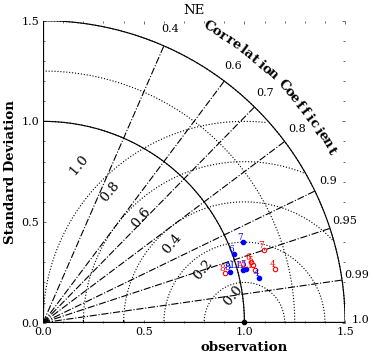

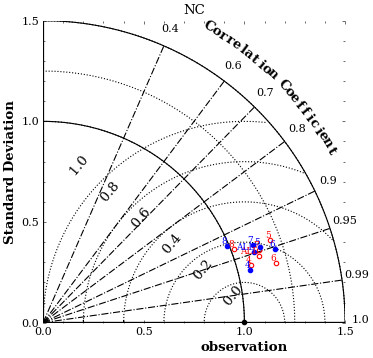

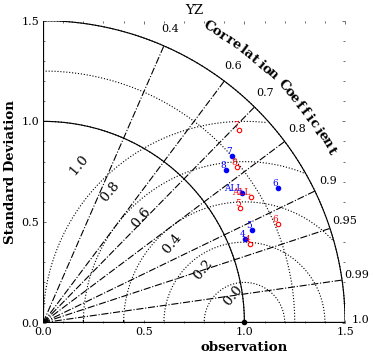

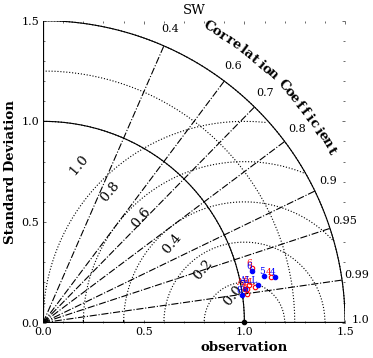

In [8]:
# >> taylor_diagram
# 不是多个模型对同一时段的模拟，绘制taylor图只是说明下相关性
# 逐年的固定某个月份 下面的 rmsd_select_year 在 months 中的范围大致是相同的
# label = ['Non-Dimensional Observation', 'M1']
first_plot = 'off'
# color_plot = ["m","y","c","g"]
color_plot = ["r","b"]
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展
# fig,ax = plt.subplots(4,1,figsize=(16,12))
# ax1=fig.add_subplot(2,2,1)
# ax2=fig.add_subplot(2,2,3)
ind = 0
partial_list = ["NE", "NC", "YZ", "SW"]
for partial_ind in partial_list:
    fig = plt.figure(figsize=(5, 5), dpi=80)
    model_plot = partial_res[partial_ind]
    label2 = ["obs","4","5","6","7","8","ALL"]
    # label2 = 
    # label2 = {"obs":"b","4":"r","5":"g","6":"k","7":"r","8":"r","ALL":"r"}
    lsCOR = np.concatenate((np.arange(0.4,1.0,0.2), [0.7,0.9, 0.95, 0.99, 1]))

    sm.taylor_diagram(model_plot['vr']['sdev'],model_plot['vr']['crmsd'],model_plot['vr']['ccoef'], 
    markerLabel = label2, 
    numberPanels = 1,
    # markerLabel = , 
    # markerlegend = "on",
    tickRMS = np.arange(0,1.2,0.2), tickRMSangle = 140, 
    colRMS = 'k', styleRMS = ':', widthRMS = 1.0,
    tickCOR = lsCOR,
    showlabelsRMS = "on",
    titleRMS = "off",
    colCOR = "k", 
    widthCOR = 1.0,
    tickSTD = [0,1,1.25,1.5], axismax = 1.5, 
    showlabelsSTD = 'on',
    rmslabelformat = ':.1f',
    styleOBS = '-', 
    colOBS = 'k',
    markerobs = 'o', 
    markerColor = color_plot[ind],
    markerLabelColor = 'r',
    markerSize = 8, 
    alpha = 0., 
    overlay = first_plot,
    titleOBS = 'observation')

    sm.taylor_diagram(model_plot['rcm']['sdev'],model_plot['rcm']['crmsd'],model_plot['rcm']['ccoef'], markerLabel =label2,
    markerColor = color_plot[ind + 1],
    # markerlegend = "on",
    markerLabelColor = 'b', 
    titleOBS = 'observation',
    markerSize = 8 ,
    alpha = 1., 
    overlay='on')

    # ax2 = sm.taylor_diagram(model_plot['rcm']['sdev'],model_plot['rcm']['crmsd'],model_plot['rcm']['ccoef'], markerLabel =label2,
    # markerColor = color_plot[ind],
    # # markerlegend = "on",
    # markerLabelColor = 'b', 
    # titleOBS = 'observation',
    # markerSize = 8 ,
    # alpha = 1., 
    # overlay='off')

    # ind = ind + 1


    plt.title(partial_ind)
    # color_plot = ["m","y","w","g"]
    # partial_list = ["NE", "NC", "YZ", "SW"]
    import matplotlib.patches as mpatches
    patch = []
    patch.append(mpatches.Patch(color='r', label='VR'))
    patch.append(mpatches.Patch(color='b', label='RCM'))
    # patch.append(mpatches.Patch(color='m', label='NE'))
    # patch.append(mpatches.Patch(color='y', label='NC'))
    # patch.append(mpatches.Patch(color='c', label='YZ'))
    # patch.append(mpatches.Patch(color='g', label='SW'))
    # plt.legend(handles= patch, loc=[0.85,0.85])

    # legend_elements = [color='b', lw=4, label='Line'),
    # Line2D([0], [0], marker='o', color='w', label='Scatter',
    #                           markerfacecolor='g', markersize=15),
    #                    Patch(facecolor='orange', edgecolor='r',
    #                          label='Color Patch')]
    # plt.legend(label1, loc='upper right')

    # pic_output_path = "/m2data2/yycheng/playground/MPAS_case_study/case_template/92-25km_vr_rcm_postprocess/visualization/check_obs/check_cn051/pre/taylor/output_pic/"
    plt.savefig("./output_pic/taylor_" + partial_ind,dpi=300, facecolor = 'white')
    # del(ax)